In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lb
import librosa.display
from sklearn.model_selection import train_test_split

## 病気の種類分布確認

In [2]:
diagnosis = pd.read_csv('../dataset/Respiratory_Sound_Database/Respiratory_Sound_Database/Respiratory_Sound_Database/patient_diagnosis.csv', names=['pid', 'disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


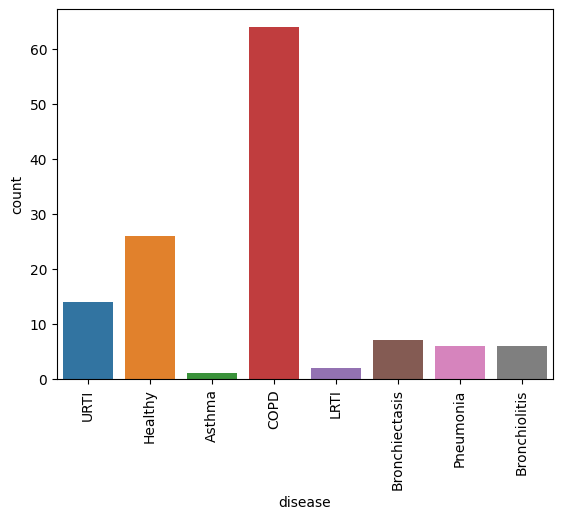

In [3]:
sns.countplot(x=diagnosis['disease'])
plt.xticks(rotation=90)
plt.show()

In [4]:
preprocessed_file_dir = Path('../dataset/preprocessed_audio_files/')
num_files = len(list(preprocessed_file_dir.iterdir()))
df_base = []
for file_path in preprocessed_file_dir.iterdir():
    df_base.append({
        'pid': file_path.stem.split('_')[0],
        'filename': file_path.name
    })
files_df = pd.DataFrame(df_base)
files_df['pid'] = files_df['pid'].astype('int64')
files_df.head()

,pid,filename
0,158,158_1p3_Pl_mc_AKGC417L_7.wav
1,201,201_1b1_Al_sc_Meditron_6.wav
2,130,130_1p3_Ll_mc_AKGC417L_3.wav
3,166,166_1p1_Pl_sc_Meditron_0.wav
4,170,170_1b4_Pr_mc_AKGC417L_5.wav


In [13]:
data = files_df.merge(diagnosis, on='pid')
data.head()

,pid,filename,disease
0,158,158_1p3_Pl_mc_AKGC417L_7.wav,COPD
1,158,158_1p4_Lr_mc_AKGC417L_5.wav,COPD
2,158,158_1p2_Ll_mc_AKGC417L_1.wav,COPD
3,158,158_1p3_Tc_mc_AKGC417L_8.wav,COPD
4,158,158_1p3_Lr_mc_AKGC417L_8.wav,COPD


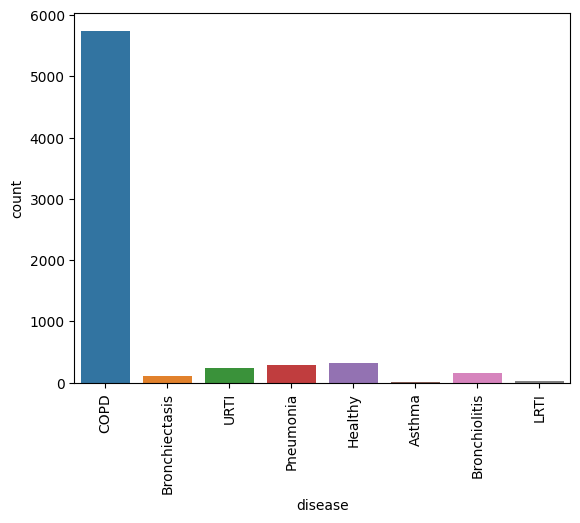

In [16]:
sns.countplot(x=data.disease)
plt.xticks(rotation=90)
plt.show()

In [45]:
pd.DataFrame(np.unique(data['disease'], return_counts=True)).T.set_axis(['disease', 'count'], axis=1).sort_values(by='count', ascending=False)

,disease,count
3,COPD,5746
4,Healthy,322
6,Pneumonia,285
7,URTI,243
2,Bronchiolitis,160
1,Bronchiectasis,104
5,LRTI,32
0,Asthma,6


In [53]:
X_train, X_val, y_train, y_val = train_test_split(data, data['disease'], stratify=data['disease'], random_state=42, test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, stratify=y_val, random_state=42, test_size=.5)

In [54]:
X_train['disease'].value_counts() / len(X_train)

COPD              0.833057
Healthy           0.046603
Pneumonia         0.041425
URTI              0.035211
Bronchiolitis     0.023198
Bronchiectasis    0.015120
LRTI              0.004557
Asthma            0.000829
Name: disease, dtype: float64

In [55]:
X_val['disease'].value_counts() / len(X_val)

COPD              0.832850
Healthy           0.047343
Pneumonia         0.040580
URTI              0.035749
Bronchiolitis     0.023188
Bronchiectasis    0.014493
LRTI              0.004831
Asthma            0.000966
Name: disease, dtype: float64

In [56]:
X_test['disease'].value_counts() / len(X_test)

COPD              0.832850
Healthy           0.046377
Pneumonia         0.041546
URTI              0.034783
Bronchiolitis     0.023188
Bronchiectasis    0.015459
LRTI              0.004831
Asthma            0.000966
Name: disease, dtype: float64

In [32]:
X_train.to_csv('train.csv', index=False)
X_val.to_csv('val.csv', index=False)
X_test.to_csv('test.csv', index=False)

In [60]:
for train_filename in X_train['filename'].to_list():
    for val_filename in X_val['filename'].to_list():
        assert train_filename != val_filename, '学習データと検証用データが一致していないこと'
    for test_filename in X_test['filename'].to_list():
        assert train_filename != test_filename, '学習データとテストデータ一致していないこと'

for val_filename in X_val['filename'].to_list():
    for test_filename in X_test['filename'].to_list():
        assert val_filename != test_filename, '検証用データとテストデータ一致していないこと' 
